In [1]:
import os
import sys
import math
sys.path.append('/home/feldheimlab/population-encoding-main/')

from scipy.stats import poisson
from scipy.stats import norm
import scipy.io

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd

from Experiment import *
from guassian_fit import *

In [2]:

path = './data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(path + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(path + 'asdf.mat')['IDs']
location = scipy.io.loadmat(path + 'asdf.mat')['location']

eisummary = scipy.io.loadmat(path + 'eisummary.mat')
xy = scipy.io.loadmat(path + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(path + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(path + 'ttlTimes.mat')['ttlTimes'])/1000

In [3]:
#based off of loadGoodAuditoryFit in Experiment.m
mode = 2 #2: Kent distribution fit, top-Z coordinates, integration window 1

fitresults = scipy.io.loadmat(path + 'AuditorySpotSummary_2.mat')['fitresult']
posneu1 = np.squeeze(scipy.io.loadmat(path + 'AuditorySpotSummary_2.mat')['posneu1'])-1

fits = fitresults[mode]
aic = False
nparam=7
params = np.zeros((len(asdf)-2,nparam,2))
good_fit = np.zeros((len(asdf)-2))
ic_accept = np.zeros((len(asdf)-2))

print()
for p, pos in enumerate(posneu1):
    good_fit[pos] = np.squeeze(fits[0][p][0][0][0][10])#good_fit?
    if good_fit[pos]:
        if aic:
            factor = 2
        else:
            factor = np.log(85)
        nll2 = fits[0][p][0][0][0][7]#nll2
        flatnll2 = fits[0][p][0][0][0][12]#flatnll2
        ic_model = nll2 + factor * nparam
        ic_flat = flatnll2 + factor
        if ic_flat > ic_model:
            ic_accept[pos] = 1
    param_err = fits[0][p][0][0][0][2] #params_err
    cov_err = np.sqrt(np.diag(fits[0][p][0][0][0][3]))#cov_err
    params[pos, :, 0] = param_err
    params[pos, :, 1] = cov_err
print(params.shape)

IndexError: index 2 is out of bounds for axis 0 with size 0

In [294]:
#based off of loadGoodAuditoryFit in Experiment.m
mode = 2 #2: Kent distribution fit, top-Z coordinates, integration window 1

fitresults_4 = scipy.io.loadmat(path + 'AuditorySpotSummary_4.mat')['fitresult']
posneu1_4 = np.squeeze(scipy.io.loadmat(path + 'AuditorySpotSummary_4.mat')['posneu1'])-1

fits = fitresults_4[mode]
aic = False
nparam=7
params_4 = np.zeros((len(asdf)-2,nparam,2))
good_fit_4 = np.zeros((len(asdf)-2))
ic_accept_4 = np.zeros((len(asdf)-2))

print()
for p, pos in enumerate(posneu1):
    good_fit_4[pos] = np.squeeze(fits[0][p][0][0][0][10])#good_fit?
    if good_fit_4[pos]:
        if aic:
            factor = 2
        else:
            factor = np.log(85)
        nll2 = fits[0][p][0][0][0][7]#nll2
        flatnll2 = fits[0][p][0][0][0][12]#flatnll2
        ic_model = nll2 + factor * nparam
        ic_flat = flatnll2 + factor
        if ic_flat > ic_model:
            ic_accept_4[pos] = 1
    param_err = fits[0][p][0][0][0][2] #params_err
    cov_err = np.sqrt(np.diag(fits[0][p][0][0][0][3]))#cov_err
    params_4[pos, :, 0] = param_err
    params_4[pos, :, 1] = cov_err
print(params_4.shape)


(149, 7, 2)


In [337]:
def keepsimlist(list1, list2): 
    # compare two lists, return matches
    return list(set(list1) & set(list2))

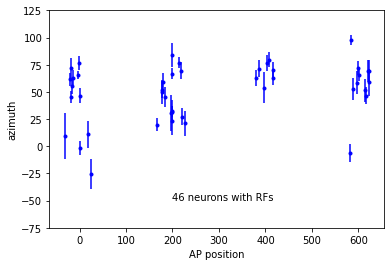

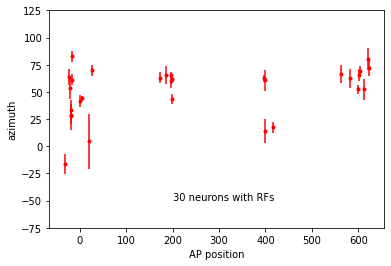

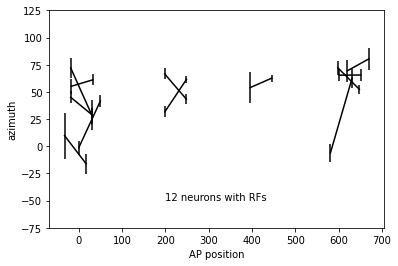

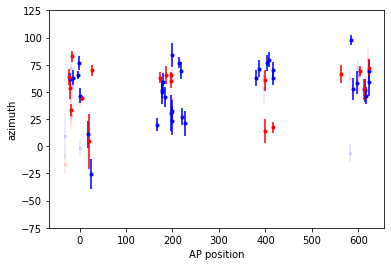

In [338]:
large = params[:,0,0] > 0
noi = np.where(large + ic_accept==2)[0]

rfs = params[:,3]*180/np.pi
#####

plt.errorbar(xy['y'][0][noi]/2, rfs[noi,0], yerr= rfs[noi,1], fmt='.',color='blue', linestyle='None')
plt.text(200,-50,'{} neurons with RFs'.format(len(noi)))

plt.ylabel('azimuth')
plt.xlabel('AP position')

plt.ylim([-75, 125])
plt.show()

large = params_4[:,0,0] > 0
noi_4 = np.where(large + ic_accept_4==2)[0]

rfs_4 = params_4[:,3]*180/np.pi
####
plt.errorbar(xy['y'][0][noi_4]/2, rfs_4[noi_4,0], yerr= rfs_4[noi_4,1], fmt='.',color='red', linestyle='None')
plt.text(200,-50,'{} neurons with RFs'.format(len(noi_4)))

plt.ylabel('azimuth')
plt.xlabel('AP position')
plt.ylim([-75, 125])
plt.show()

sim = keepsimlist(noi.tolist(), noi_4.tolist()) 

for s in sim:
    plt.errorbar([xy['y'][0][s]/2, xy['y'][0][s]/2+50], 
                 [rfs[s,0], rfs_4[s,0]], 
                 yerr= [rfs[s,1], rfs_4[s,1]],color='k')
plt.text(200,-50,'{} neurons with RFs'.format(len(sim)))
plt.ylabel('azimuth')
plt.xlabel('AP position')
plt.ylim([-75, 125])

plt.show()
######
plt.errorbar(xy['y'][0][noi]/2, rfs[noi,0], yerr= rfs[noi,1], color='blue', linestyle='None',fmt='.', alpha=0.1)
plt.errorbar(xy['y'][0][noi_4]/2, rfs_4[noi_4,0], yerr= rfs_4[noi_4,1], color='red', linestyle='None',fmt='.', alpha=0.1)

for n in noi:
    if n in sim:
        continue
    else:
        plt.errorbar(xy['y'][0][n]/2, rfs[n,0], yerr= rfs[n,1], color='blue', linestyle='None',fmt='.')

for n in noi_4:
    if n in sim:
        continue
    else:
        plt.errorbar(xy['y'][0][n]/2, rfs_4[n,0], yerr= rfs_4[n,1], color='red', linestyle='None', fmt='.')
plt.ylabel('azimuth')
plt.xlabel('AP position')
plt.ylim([-75, 125])

plt.show()



./data001,data002,data003,data004/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
149/149 neurons are in the SC
	Loading auditory_spot_posneu_2.mat with SciPy
	Loading auditory_spot_posneu_4.mat with SciPy


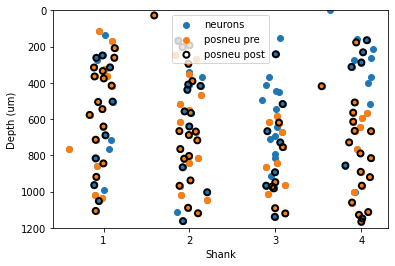

	Loading auditory_spot_summary_2-patterns-fullpat.mat with SciPy
	Loading auditory_spot_summary_4-patterns-fullpat.mat with SciPy


In [346]:
path = './data001,data002,data003,data004/'

#load the data for each of the datsets
print(path)
e = Experiment(path) # load the experimental data
# e.resetUseIDs()

print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')

posneu2 = np.where(e.loadData('auditory_spot_posneu_2.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('auditory_spot_posneu_4.mat')['posneu'])[0]

posneu2 = np.where(good_fit)[0]
posneu4 = np.where(good_fit_4)[0]

plt.scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
plt.scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')
 
# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

plt.ylim([1200,0])
plt.legend()
plt.ylabel('Depth (um)')
plt.xlabel('Shank')
plt.xticks([0,400,800,1200],[1,2,3,4])
plt.show()

timerange = 200
timeBinSz = 5

pat2 = e.loadData('auditory_spot_summary_2-patterns-fullpat.mat')
data_mat2 = patternToMatrix(pat2['pat'][0], timerange, timeBinSz, np.arange(len(posneu2)), norm=False, count=True)           

pat4 = e.loadData('auditory_spot_summary_4-patterns-fullpat.mat')
data_mat4 = patternToMatrix(pat4['pat'][0], timerange, timeBinSz, np.arange(len(posneu4)), norm=False, count=True)   

In [348]:
print(np.sort(sim))
samelst = []
pos2lst = []
samelst2 = []
pos2lst2 = []

for p, pos in enumerate(noi):
    if pos in sim:
        samelst.append(pos)
        pos2lst.append(p)
        
for p, pos in enumerate(noi_4):
    if pos in sim:
        samelst2.append(pos)
        pos2lst2.append(p)
        
print(samelst)
print(pos2lst)

print(samelst2)
print(pos2lst2)

[  1  16  17  25  28  71  72 106 114 118 119 135]
[1, 16, 17, 25, 28, 71, 72, 106, 114, 118, 119, 135]
[0, 4, 5, 6, 8, 24, 25, 34, 35, 37, 38, 43]
[1, 16, 17, 25, 28, 71, 72, 106, 114, 118, 119, 135]
[0, 5, 6, 9, 11, 16, 17, 20, 22, 23, 24, 28]


(86, 5, 17, 30, 40) (12, 17, 40) (12, 17)
(86, 5, 17, 30, 40) (12, 17, 40) (12, 17)


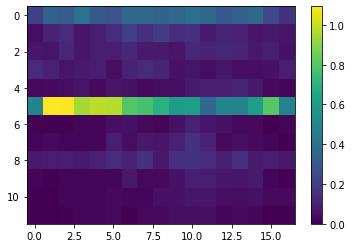

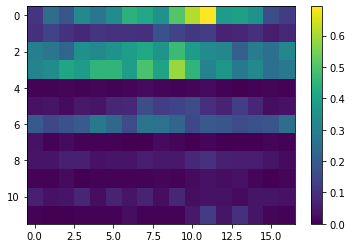

In [349]:
data_mat2.shape
axmean= np.mean(data_mat2[pos2lst], axis=(1,3))
axsum= np.sum(axmean[:,:,:4], axis=2)

data_mat4.shape
muscaxmean= np.mean(data_mat4[pos2lst2], axis=(1,3))
muscaxsum= np.sum(muscaxmean[:,:,:4], axis=2)
#musc = muscimol experimental group

print(data_mat2.shape, axmean.shape, axsum.shape)
print(data_mat4.shape, muscaxmean.shape, muscaxsum.shape)

plt.imshow(axsum, aspect='auto')
plt.colorbar()
plt.show()

plt.imshow(muscaxsum, aspect='auto')
plt.colorbar()
plt.show()

(12,) (12,)


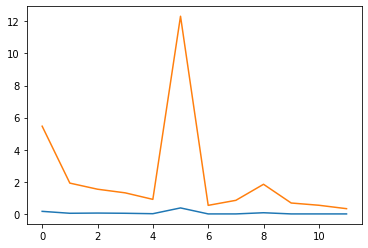

(12,) (12,)


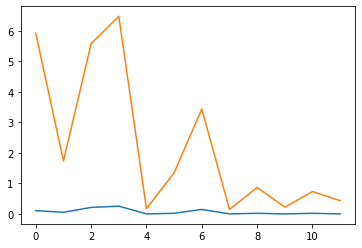

In [350]:
neumin= np.min(axsum, axis= 1)
neusum= np.sum(axsum, axis= 1)
print(neusum.shape, neumin.shape)

plt.plot(neumin)
plt.plot(neusum)
plt.show()

muscneumin= np.min(muscaxsum, axis= 1)
muscneusum= np.sum(muscaxsum, axis= 1)
print(muscneusum.shape, muscneumin.shape)

plt.plot(muscneumin)
plt.plot(muscneusum)
plt.show()

(17, 7)


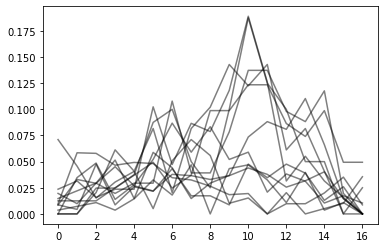

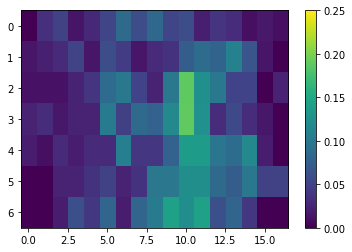

(array([], dtype=int64),)


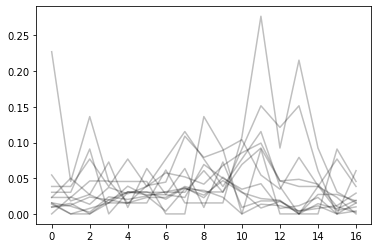

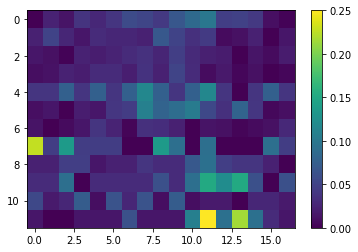

In [356]:
norm= (axsum.T - neumin)/(neusum)
which = np.max(norm, axis=0)>0.08
print(norm[:,which].shape)
plt.plot(norm, color='k', alpha=0.5)
plt.show()


plt.imshow(norm[:,which].T, aspect='auto', vmax=0.25)
plt.colorbar()
plt.show()

print(np.where(muscneusum==0))
muscnorm= (muscaxsum.T - muscneumin)/(muscneusum)
plt.plot(muscnorm, color='k', alpha=0.25)
plt.show()

# muscnorm = muscnorm.T[~np.isnan(muscnorm.T[:,0]),:].T
plt.imshow(muscnorm.T, aspect='auto', vmax=0.25)
plt.colorbar()
plt.show()

(12,)


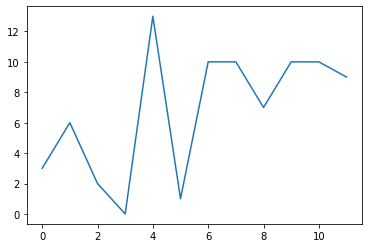

(12,)


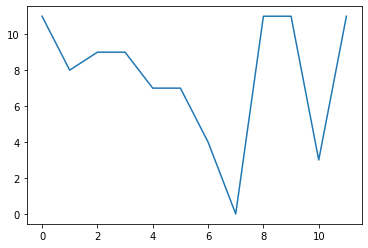

In [352]:
sortaz= np.argmax(norm.T, axis=1)
print(sortaz.shape)
plt.plot(sortaz)
plt.show()

muscsortaz= np.argmax(muscnorm.T, axis=1)
print(muscsortaz.shape)
plt.plot(muscsortaz)
plt.show()


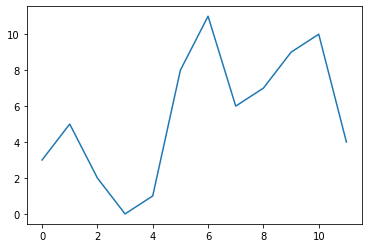

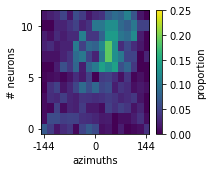

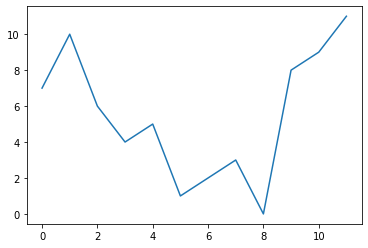

[ 3  5  2  0  1  8 11  6  7  9 10  4]
(12, 17)
(12, 17)


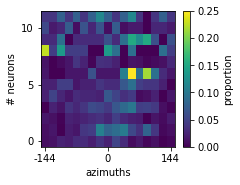

In [359]:
maxsort= np.argsort(sortaz)
plt.plot(maxsort)
plt.show()

plt.figure(figsize=(3,2.5))
plt.imshow(norm.T[maxsort], aspect='auto', vmin=0, vmax=0.25)
plt.colorbar(label='proportion')
plt.xlabel('azimuths')
plt.xticks([0,8,16],[-144,0,144])
plt.ylim([-0.5,11.5])
plt.ylabel('# neurons')
plt.yticks(np.arange(0,11,5))
plt.savefig('/home/feldheimlab/Desktop/pre_muscimol.png', dpi=300)
plt.tight_layout()
plt.show()

maxmuscsort= np.argsort(muscsortaz)
plt.plot(maxmuscsort)
plt.show()

print(maxsort)
print(muscnorm.T.shape)
print(norm.T.shape)

fig = plt.figure(figsize=(3,2.5))
plt.imshow(muscnorm.T[maxsort], aspect='auto', vmin=0, vmax=0.25)
plt.colorbar(label='proportion')
plt.xlabel('azimuths')
plt.xticks([0,8,16],[-144,0,144])
plt.ylim([-0.5,11.5])
plt.ylabel('# neurons')
plt.yticks(np.arange(0,11,5))
plt.savefig('/home/feldheimlab/Desktop/post_muscimol.png', dpi=300)
plt.show()